# Análisis de Datos - Top 2000 Canciones más escuchadas de Spotify 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Cargando Dataset 

In [2]:
spotify = pd.read_csv('Spotify-2000.csv', thousands=',')
spotify.set_index(keys= 'Index', inplace=True)

### Entendiendo la base de datos 

In [3]:
spotify.head()

Title             Artist            Top Genre  Year  \
Index                                                                         
1                     Sunrise        Norah Jones      adult standards  2004   
2                 Black Night        Deep Purple           album rock  2000   
3              Clint Eastwood           Gorillaz  alternative hip hop  2001   
4               The Pretender       Foo Fighters    alternative metal  2007   
5      Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

       Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
Index                                                                          
1                         157      30            53            -14        11   
2                         135      79            50            -11        17   
3                         168      69            66             -9         7   
4                         173      96            43             -4         3   
5                         106      82            58             -5        10   

       Valence  Length (Duration)  Acousticness  Speechiness  Popularity  
Index                                                                     
1           68                201            94            3          71  
2           81                207            17            7          39  
3           52                341             2           17          69  
4           37                269             0            4          76  
5           87                256             1            3          59

In [4]:
spotify.sample()

Title       Artist        Top Genre  Year  \
Index                                                           
477    Georgia on My Mind  Ray Charles  adult standards  2011   

       Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
Index                                                                          
477                       131      32            29             -8        19   

       Valence  Length (Duration)  Acousticness  Speechiness  Popularity  
Index                                                                     
477         20                215            86            3          49

In [5]:
spotify.describe()

Year  Beats Per Minute (BPM)       Energy  Danceability  \
count  1994.000000             1994.000000  1994.000000   1994.000000   
mean   1992.992979              120.215647    59.679539     53.238215   
std      16.116048               28.028096    22.154322     15.351507   
min    1956.000000               37.000000     3.000000     10.000000   
25%    1979.000000               99.000000    42.000000     43.000000   
50%    1993.000000              119.000000    61.000000     53.000000   
75%    2007.000000              136.000000    78.000000     64.000000   
max    2019.000000              206.000000   100.000000     96.000000   

       Loudness (dB)     Liveness      Valence  Length (Duration)  \
count    1994.000000  1994.000000  1994.000000        1994.000000   
mean       -9.008526    19.012036    49.408726         262.443330   
std         3.647876    16.727378    24.858212          93.604387   
min       -27.000000     2.000000     3.000000          93.000000   
25%       -11.000000     9.000000    29.000000         212.000000   
50%        -8.000000    12.000000    47.000000         245.000000   
75%        -6.000000    23.000000    69.750000         289.000000   
max        -2.000000    99.000000    99.000000        1412.000000   

       Acousticness  Speechiness  Popularity  
count   1994.000000  1994.000000  1994.00000  
mean      28.858074     4.994985    59.52658  
std       29.011986     4.401566    14.35160  
min        0.000000     2.000000    11.00000  
25%        3.000000     3.000000    49.25000  
50%       18.000000     4.000000    62.00000  
75%       50.000000     5.000000    71.00000  
max       99.000000    55.000000   100.00000

### Preguntas
* 1. ¿Qué artista tiene más canciones dentro del top histórico?
* 2. ¿Cuáles son los géneros más escuchados?
* 3. ¿Las canciones antiguas son más populares?
* 4. ¿En algún año en específico hay canciones más populares?
* 5. ¿Existe algún motivo por el que las canciones son más populares?

### Media por columnas numéricas

In [6]:
spotify_desc = spotify.describe()
spotify_desc.loc['mean']

Year                      1992.992979
Beats Per Minute (BPM)     120.215647
Energy                      59.679539
Danceability                53.238215
Loudness (dB)               -9.008526
Liveness                    19.012036
Valence                     49.408726
Length (Duration)          262.443330
Acousticness                28.858074
Speechiness                  4.994985
Popularity                  59.526580
Name: mean, dtype: float64

### Análisis de valores Ausentes 

In [7]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1 to 1994
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   int64 
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 233.7+ KB


In [8]:
spotify.isnull().sum()

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [9]:
spotify.duplicated().sum()

0

### Definiendo las columnas con valores númericos 

In [10]:
spotify_num = spotify.drop(spotify.columns[[0, 1, 2]], axis=1)
spotify_num_desc = spotify_num.describe()
spotify_num_desc.loc['mean']

Year                      1992.992979
Beats Per Minute (BPM)     120.215647
Energy                      59.679539
Danceability                53.238215
Loudness (dB)               -9.008526
Liveness                    19.012036
Valence                     49.408726
Length (Duration)          262.443330
Acousticness                28.858074
Speechiness                  4.994985
Popularity                  59.526580
Name: mean, dtype: float64

<AxesSubplot:>

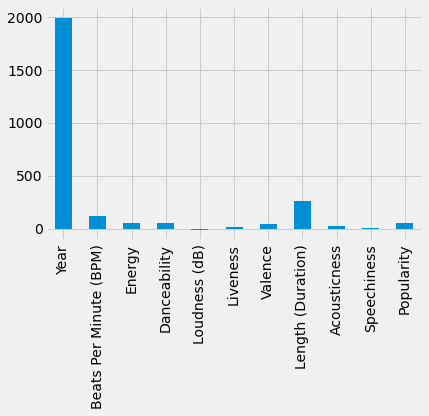

In [11]:
plt.style.use('fivethirtyeight')
spotify_num_desc.loc['mean'].plot.bar()

### Histogramas valores numéricos

In [12]:
spotify_num.head()

Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
Index                                                                      
1      2004                     157      30            53            -14   
2      2000                     135      79            50            -11   
3      2001                     168      69            66             -9   
4      2007                     173      96            43             -4   
5      2002                     106      82            58             -5   

       Liveness  Valence  Length (Duration)  Acousticness  Speechiness  \
Index                                                                    
1            11       68                201            94            3   
2            17       81                207            17            7   
3             7       52                341             2           17   
4             3       37                269             0            4   
5            10       87                256             1            3   

       Popularity  
Index              
1              71  
2              39  
3              69  
4              76  
5              59

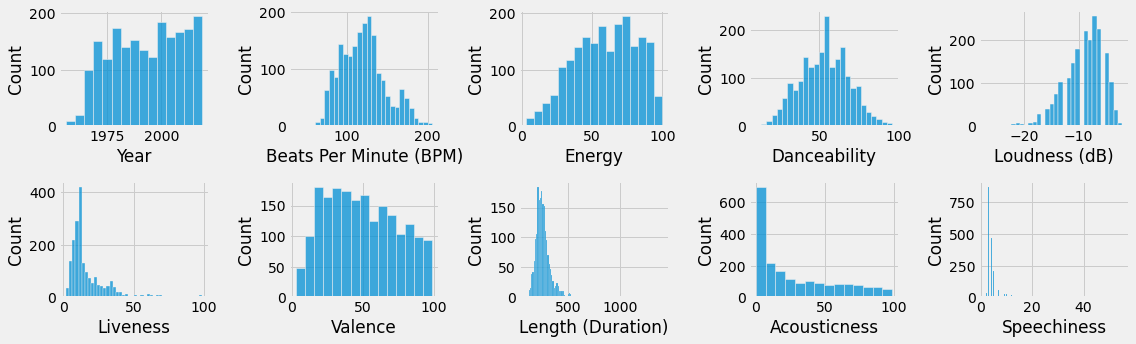

In [13]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,5))

col = spotify_num.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.histplot(spotify_num[col[index]], ax = ax[i][j])
        index = index+1
plt.tight_layout()

* ¿Qué artista tiene más canciones dentro del top histórico?
* ¿Cuáles son los géneros más escuchados del top 2000?
* ¿En algún año en específico hay canciones más populares?

In [14]:
fig = go.Figure()
fig = make_subplots(rows=2, 
                    cols=2, 
                    subplot_titles=(
                        "Artistas destacados",
                        "Géneros más escuchados",
                        "Año con más canciones top 2000"))

top_artist_count = spotify.Artist.value_counts()[:10]
top_artist_values = top_artist_count.index.unique()
fig.add_trace(go.Bar(x=top_artist_values, y=top_artist_count), 1, 1)

genre_count = spotify['Top Genre'].value_counts()[:10]
genre_values = genre_count.index.unique()
fig.add_trace(go.Bar(x=genre_values, y=genre_count), 1, 2)

year_count = spotify.Year.value_counts()[:20]
year_values = year_count.index.unique()
fig.add_trace(go.Bar(x=year_values, y=year_count), 2, 1)

### Identificando Patrones 

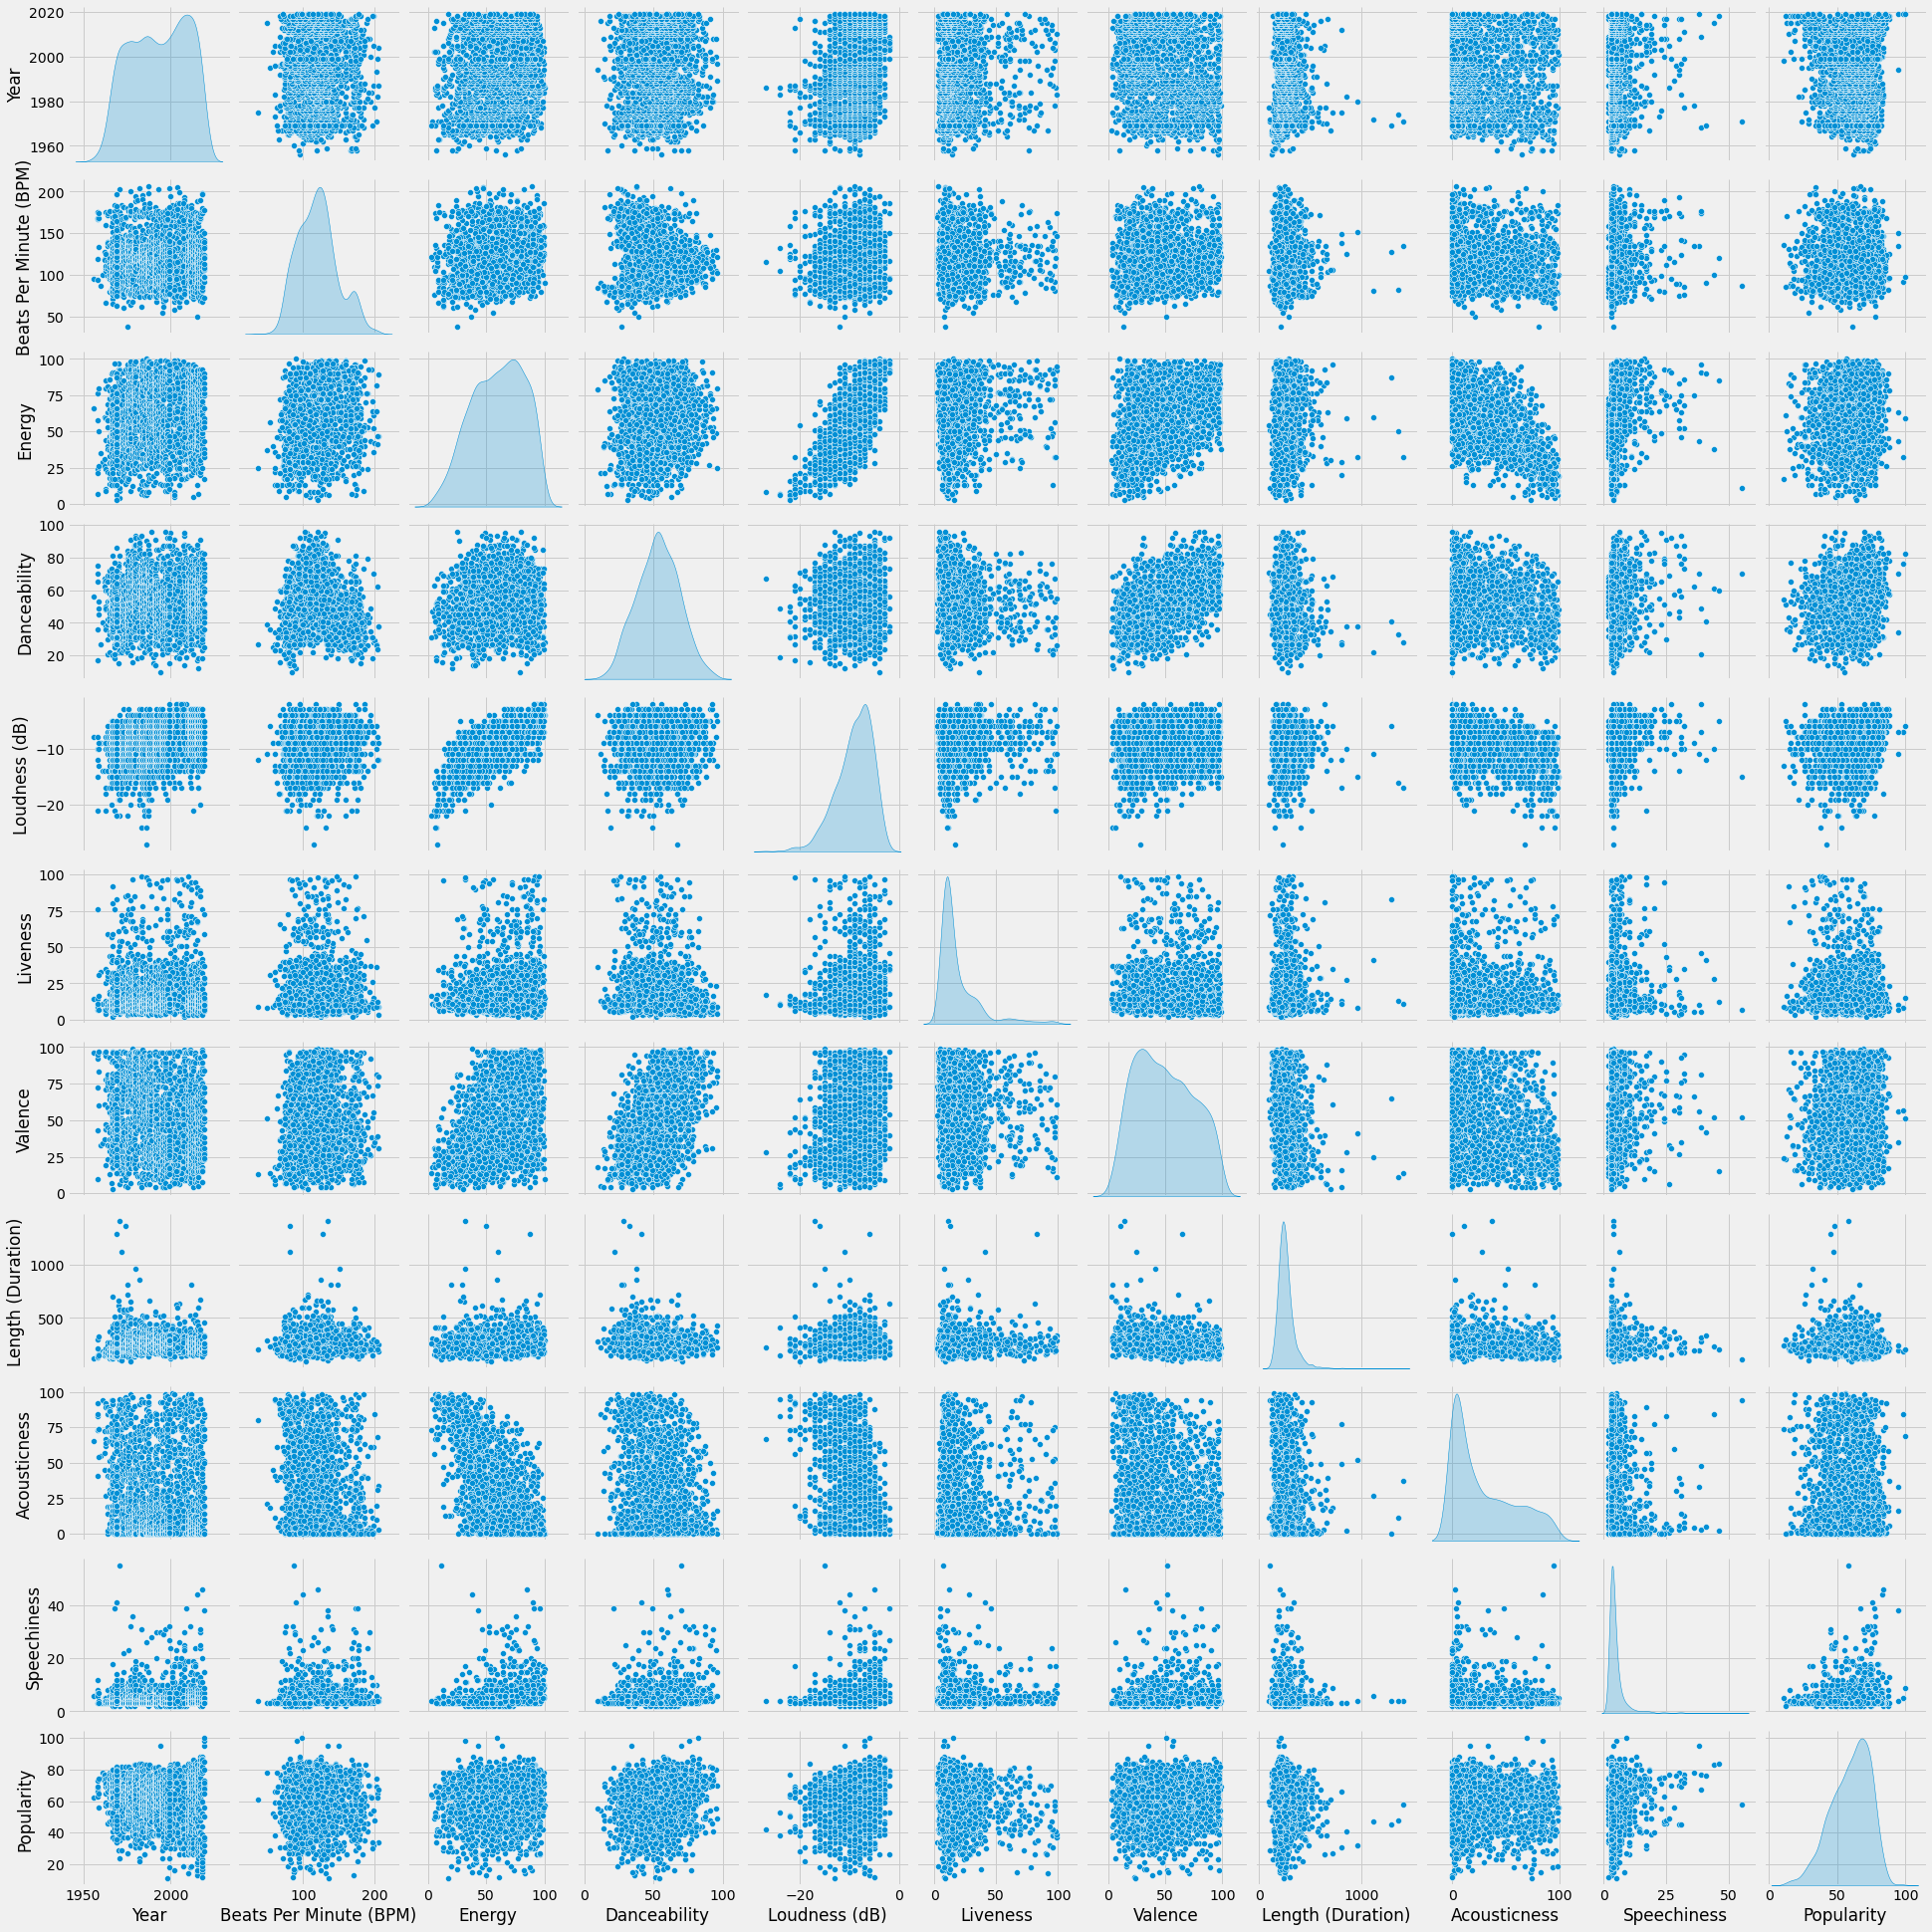

In [15]:
sns.pairplot(spotify.iloc[:, np.hstack(([0], range(3,14)))], diag_kind='kde')

### ¿Existe algún motivo por el que las canciones son más populares? 

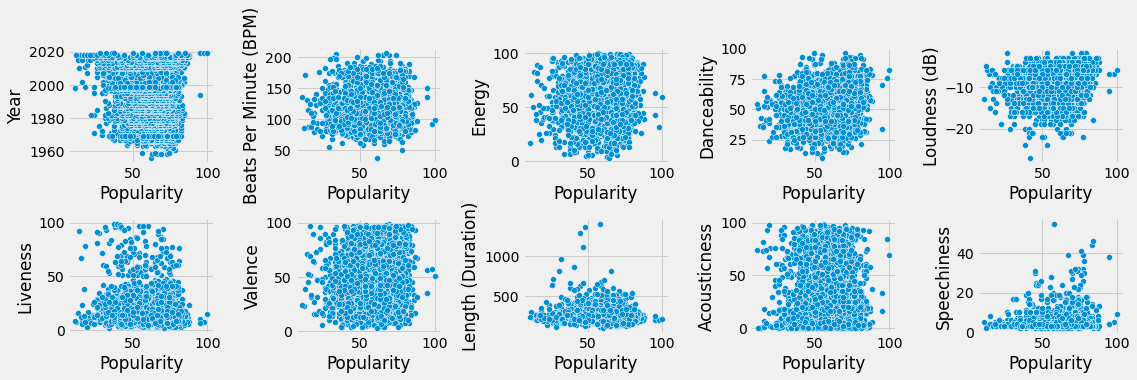

In [16]:
rows = 2
cols = 5

fig, ax = plt.subplots(rows, cols, figsize = (16,5))
col= spotify_num.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x= 'Popularity', y=col[index], data=spotify_num, ax=ax[i][j])
        index = index+1
plt.tight_layout()
plt.show()

### Correlación para determinar Popularidad

In [17]:
corrmat = spotify_num.corr()
corrmat

Year  Beats Per Minute (BPM)    Energy  \
Year                    1.000000                0.012570  0.147235   
Beats Per Minute (BPM)  0.012570                1.000000  0.156644   
Energy                  0.147235                0.156644  1.000000   
Danceability            0.077493               -0.140602  0.139616   
Loudness (dB)           0.343764                0.092927  0.735711   
Liveness                0.019017                0.016256  0.174118   
Valence                -0.166163                0.059653  0.405175   
Length (Duration)      -0.050346                0.006252  0.022800   
Acousticness           -0.132946               -0.122472 -0.665156   
Speechiness             0.054097                0.085598  0.205865   
Popularity             -0.158962               -0.003181  0.103393   

                        Danceability  Loudness (dB)  Liveness   Valence  \
Year                        0.077493       0.343764  0.019017 -0.166163   
Beats Per Minute (BPM)     -0.140602       0.092927  0.016256  0.059653   
Energy                      0.139616       0.735711  0.174118  0.405175   
Danceability                1.000000       0.044235 -0.103063  0.514564   
Loudness (dB)               0.044235       1.000000  0.098257  0.147041   
Liveness                   -0.103063       0.098257  1.000000  0.050667   
Valence                     0.514564       0.147041  0.050667  1.000000   
Length (Duration)          -0.135432      -0.056127  0.032499 -0.203690   
Acousticness               -0.135769      -0.451635 -0.046206 -0.239729   
Speechiness                 0.125229       0.125090  0.092594  0.107102   
Popularity                  0.144344       0.165527 -0.111978  0.095911   

                        Length (Duration)  Acousticness  Speechiness  \
Year                            -0.050346     -0.132946     0.054097   
Beats Per Minute (BPM)           0.006252     -0.122472     0.085598   
Energy                           0.022800     -0.665156     0.205865   
Danceability                    -0.135432     -0.135769     0.125229   
Loudness (dB)                   -0.056127     -0.451635     0.125090   
Liveness                         0.032499     -0.046206     0.092594   
Valence                         -0.203690     -0.239729     0.107102   
Length (Duration)                1.000000     -0.102319    -0.027826   
Acousticness                    -0.102319      1.000000    -0.098256   
Speechiness                     -0.027826     -0.098256     1.000000   
Popularity                      -0.065403     -0.087604     0.111689   

                        Popularity  
Year                     -0.158962  
Beats Per Minute (BPM)   -0.003181  
Energy                    0.103393  
Danceability              0.144344  
Loudness (dB)             0.165527  
Liveness                 -0.111978  
Valence                   0.095911  
Length (Duration)        -0.065403  
Acousticness             -0.087604  
Speechiness               0.111689  
Popularity                1.000000

<AxesSubplot:>

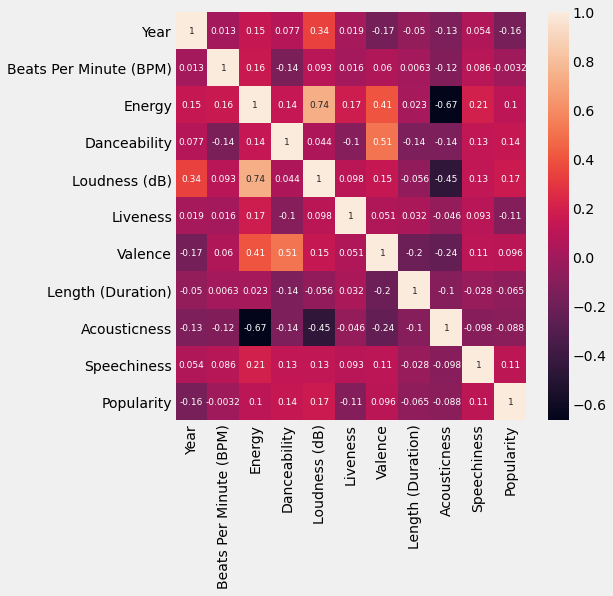

In [18]:
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(corrmat, annot =True, annot_kws = {'size': 9})

## Correlación a resaltar

In [19]:
def getCorrelation(corrdata, correlacion):
    feature=[]
    value=[]
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > correlacion:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index=feature, columns=['corr value'])
    return df

In [20]:
correlacion = 0.4
corr_df = getCorrelation(corrmat['Energy'], correlacion)
corr_df

corr value
Energy           1.000000
Loudness (dB)    0.735711
Valence          0.405175
Acousticness    -0.665156

### Heatmap y Pair Plot de correlación

In [21]:
corr_data = spotify_num[corr_df.index]
corr_data.head()

Energy  Loudness (dB)  Valence  Acousticness
Index                                              
1          30            -14       68            94
2          79            -11       81            17
3          69             -9       52             2
4          96             -4       37             0
5          82             -5       87             1

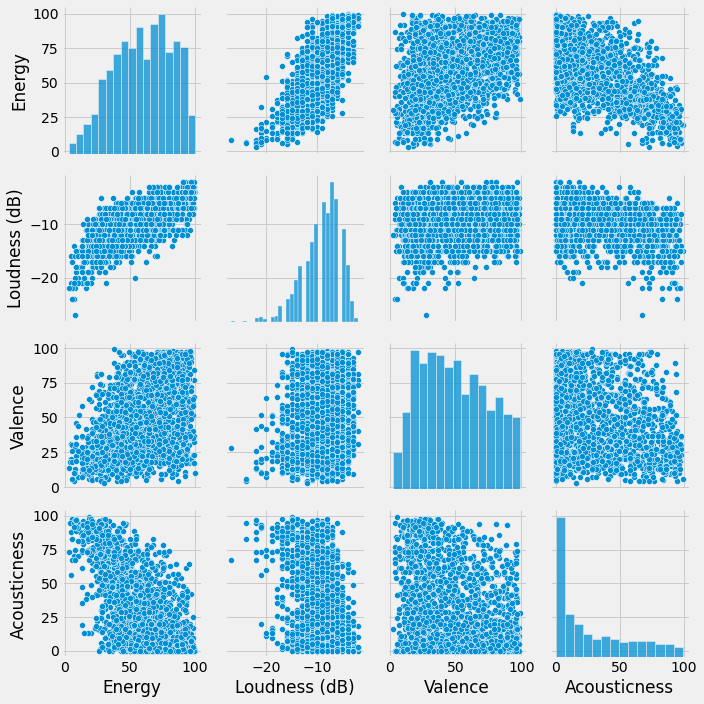

In [22]:
sns.pairplot(corr_data)
plt.tight_layout()

<AxesSubplot:>

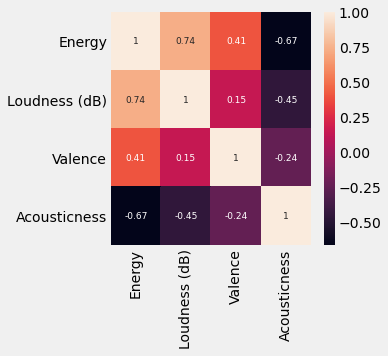

In [23]:
fig, ax = plt.subplots(figsize = (4,4))
sns.heatmap(corr_data.corr(), annot=True, annot_kws = {'size':9})

### Rel Data 

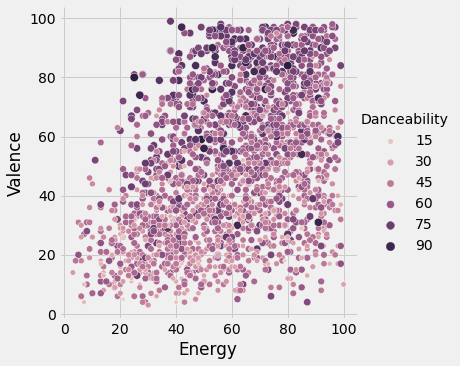

In [24]:
sns.relplot(x='Energy', y='Valence', data=spotify_num, hue='Danceability', size='Danceability')

### Joint Plot

In [25]:
spotify_num.head()

Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
Index                                                                      
1      2004                     157      30            53            -14   
2      2000                     135      79            50            -11   
3      2001                     168      69            66             -9   
4      2007                     173      96            43             -4   
5      2002                     106      82            58             -5   

       Liveness  Valence  Length (Duration)  Acousticness  Speechiness  \
Index                                                                    
1            11       68                201            94            3   
2            17       81                207            17            7   
3             7       52                341             2           17   
4             3       37                269             0            4   
5            10       87                256             1            3   

       Popularity  
Index              
1              71  
2              39  
3              69  
4              76  
5              59

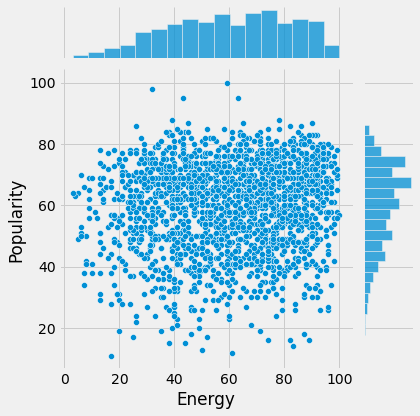

In [27]:
sns.jointplot(x=spotify_num['Energy'], y=spotify_num['Popularity'])

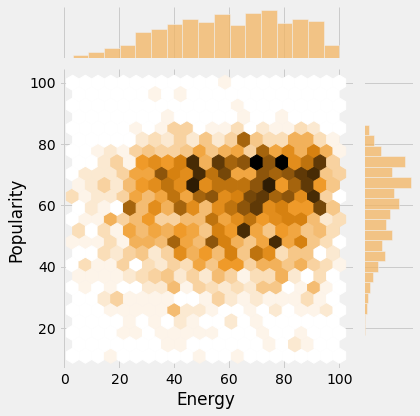

In [61]:
g = sns.jointplot(x=spotify_num['Energy'], y=spotify_num['Popularity'], kind= 'hex', color='#F3B562')

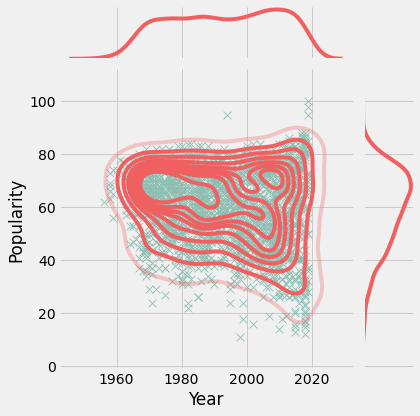

In [83]:
g = sns.jointplot(x=spotify_num['Year'], y=spotify_num['Popularity'], kind= 'kde', color= '#F06060')
g.plot_joint(plt.scatter, c='#8CBEB2', s= 60, linewidth = .8, marker= 'x')
g.ax_joint.collections[0].set_alpha(0.3)

<AxesSubplot:xlabel='Year', ylabel='Popularity'>

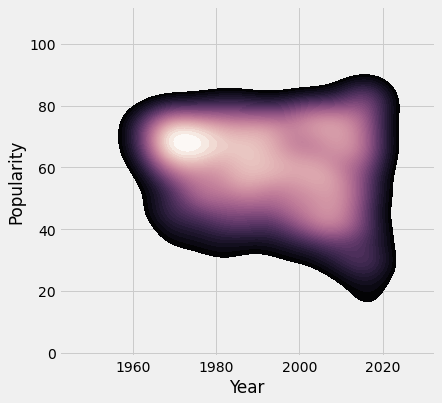

In [93]:
fig, ax = plt.subplots(figsize = (6,6))
cmap = sns.cubehelix_palette(as_cmap= True, dark = 0, light = 1, reverse = True)
sns.kdeplot(x=spotify_num['Year'], y=spotify_num['Popularity'], cmap= cmap, n_levels = 60, shade=True)

### Linear Regression 

In [64]:
spotify.head()

Title             Artist            Top Genre  Year  \
Index                                                                         
1                     Sunrise        Norah Jones      adult standards  2004   
2                 Black Night        Deep Purple           album rock  2000   
3              Clint Eastwood           Gorillaz  alternative hip hop  2001   
4               The Pretender       Foo Fighters    alternative metal  2007   
5      Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

       Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
Index                                                                          
1                         157      30            53            -14        11   
2                         135      79            50            -11        17   
3                         168      69            66             -9         7   
4                         173      96            43             -4         3   
5                         106      82            58             -5        10   

       Valence  Length (Duration)  Acousticness  Speechiness  Popularity  
Index                                                                     
1           68                201            94            3          71  
2           81                207            17            7          39  
3           52                341             2           17          69  
4           37                269             0            4          76  
5           87                256             1            3          59